In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
df=pd.read_csv(r"D:\ACADEMICS\TE-IT SEM5\ml lab\3.Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df["Chance of Admit "]=df["Chance of Admit "].apply(lambda x:1 if x>0.8 else 0)

In [7]:
y=df["Chance of Admit "]
x=df.drop("Chance of Admit ",axis=1)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)

## FOR TESTING

In [10]:
classifier1=DecisionTreeClassifier(criterion="entropy")
classifier1.fit(x_train,y_train)
classifier2=DecisionTreeClassifier(criterion="gini")
classifier2.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_test_predicted_1=classifier1.predict(x_test)
y_test_predicted_2=classifier2.predict(x_test)

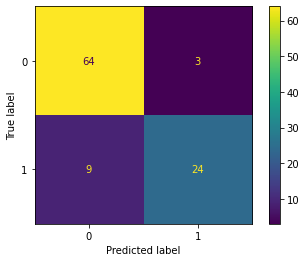

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predicted_1)

In [14]:
print("Classification Report for entropy: ")
print(classification_report(y_test,y_test_predicted_1))
print("Classification Report for gini: ")
print(classification_report(y_test,y_test_predicted_2))

Classification Report for entropy: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.91        67
           1       0.89      0.73      0.80        33

    accuracy                           0.88       100
   macro avg       0.88      0.84      0.86       100
weighted avg       0.88      0.88      0.88       100

Classification Report for gini: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.87      0.82      0.84        33

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100



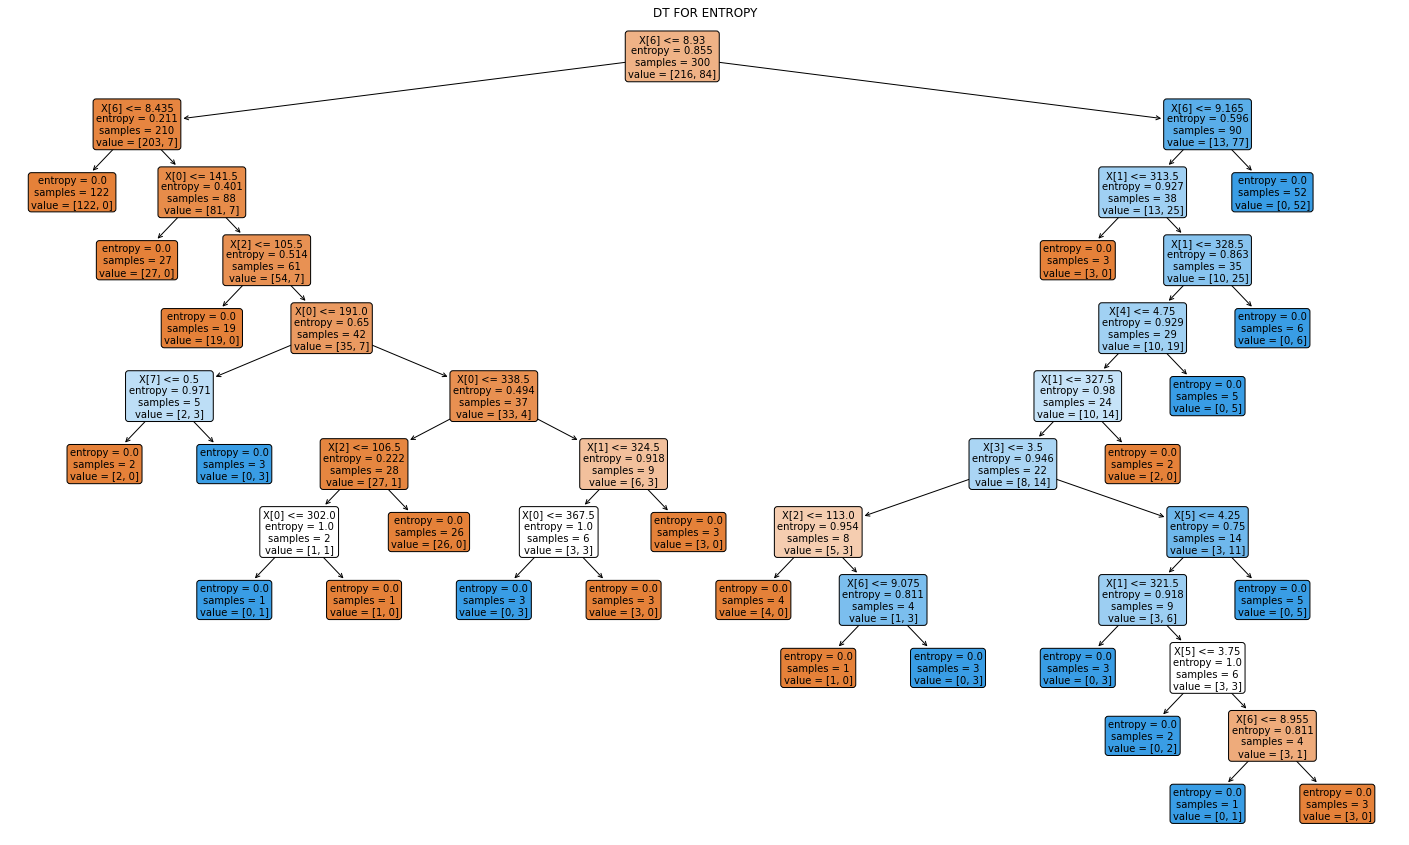

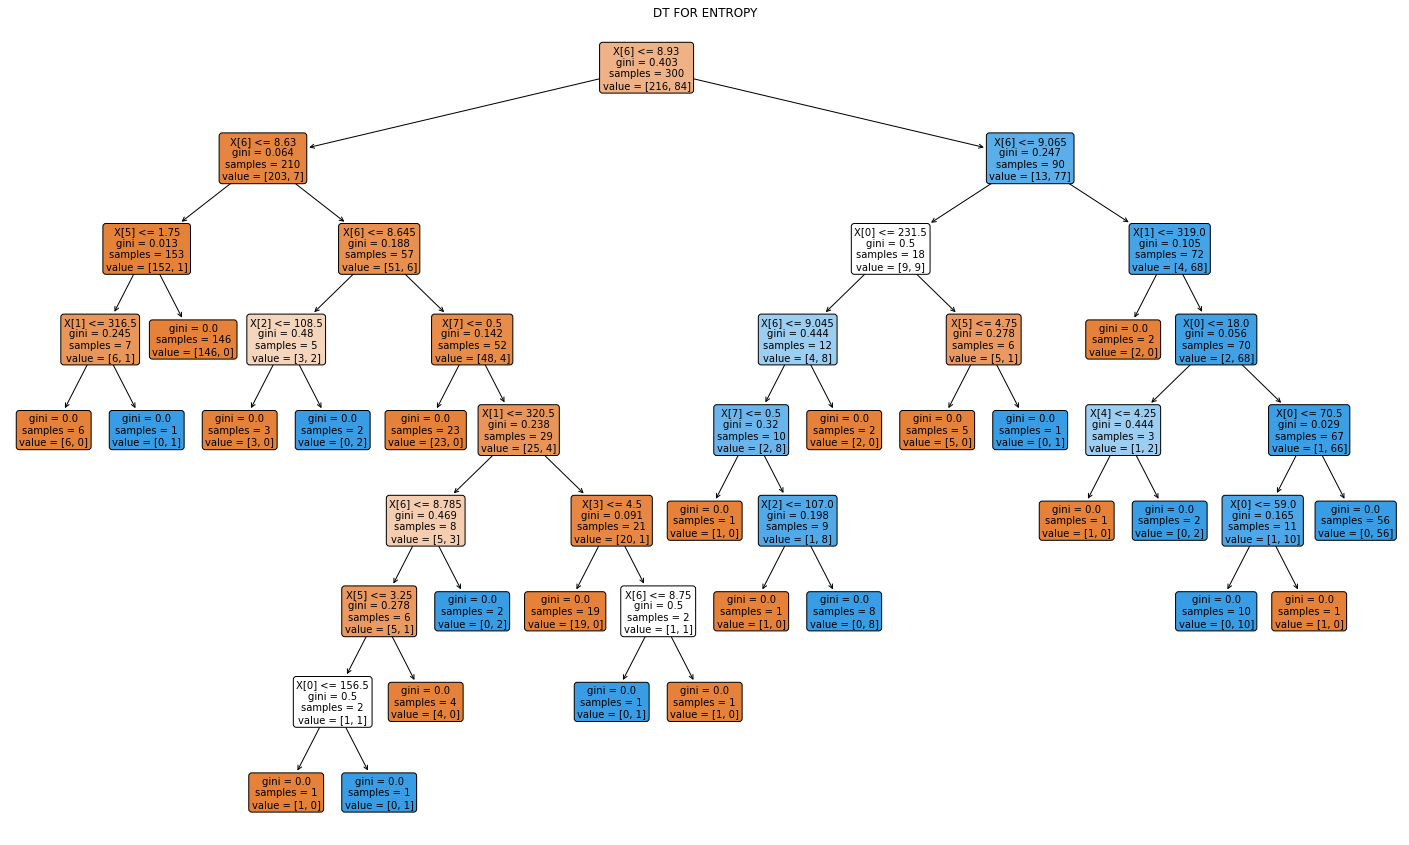

In [29]:
plt.figure(figsize=(25,15))
plot_tree(classifier1,fontsize=10,filled=True,rounded=True)
plt.title("DT FOR ENTROPY")
plt.show()
print("\n")
plt.figure(figsize=(25,15))
plot_tree(classifier2,fontsize=10,filled=True,rounded=True)
plt.title("DT FOR ENTROPY")
plt.show()